In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
ax=df['survived'].mean()
ax


np.float64(0.3838383838383838)

<Axes: ylabel='count'>

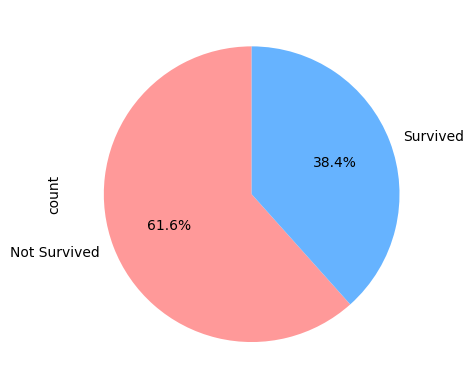

In [ ]:
df['survived'].value_counts().plot.pie(
    labels=['Not Survived','Survived'],
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff'],
    startangle=90
)

In [ ]:
df.groupby('sex')['survived'].mean().sort_values()

,survived
sex,
male,0.188908
female,0.742038


<Axes: xlabel='sex', ylabel='survived'>

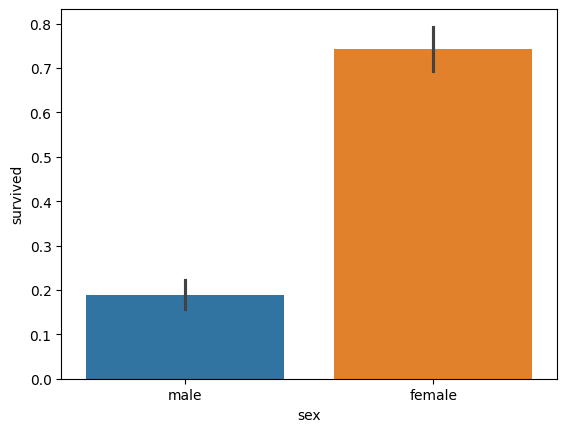

In [ ]:
sns.barplot( x = 'sex', y = 'survived', data = df,hue='sex')

<Axes: xlabel='age', ylabel='Count'>

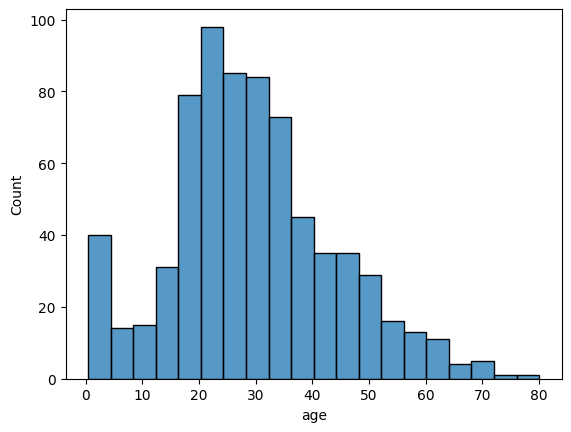

In [ ]:
sns.histplot(data=df,x=df['age'])

In [ ]:
ax=df.groupby('age')['survived'].mean()

,survived
age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


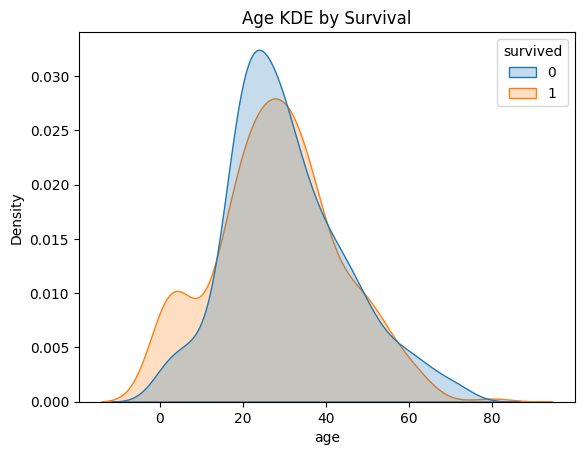

In [ ]:
sns.kdeplot(data=df, x="age", hue="survived", fill=True, common_norm=False)
plt.title("Age KDE by Survival")
plt.show()


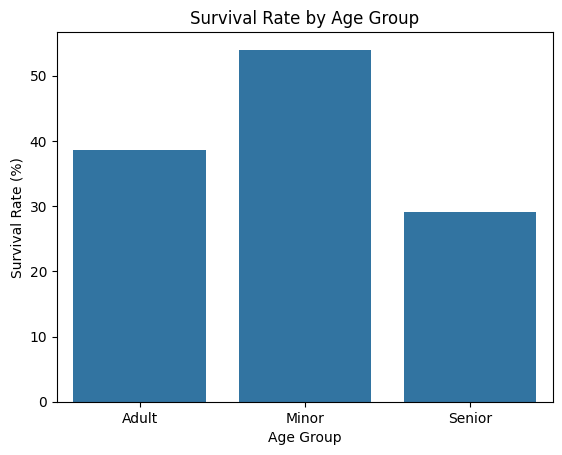

In [ ]:
def age_group(age):
  if age<18:
    return 'Minor'
  elif age>=18 and age<60:
    return 'Adult'
  else:
    return 'Senior'

df['age_grp']=df['age'].apply(age_group)

ax = df.groupby('age_grp')['survived'].mean() * 100
sns.barplot(x=ax.index, y=ax.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.show()

NameError: name 'age_grp' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_grp      891 non-null    object  
dtypes: bool(2), category(2), float64(2), int64(4), object(6)
memory usage: 87.6+ KB


In [ ]:
pd.crosstab(df['alone'],df['survived'])


survived,0,1
alone,,
0,549,342


<Axes: xlabel='alone', ylabel='survived'>

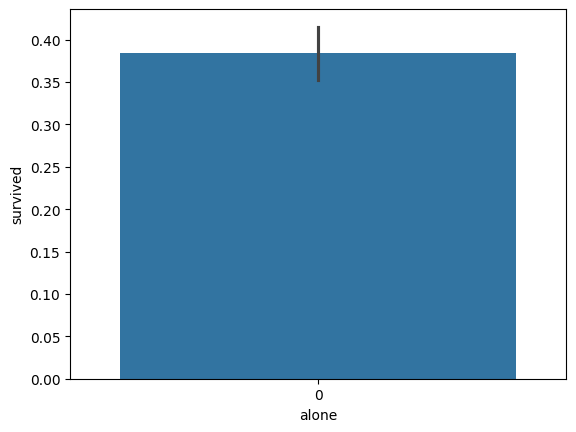

In [ ]:
sns.barplot(x='alone',y='survived',data=df)

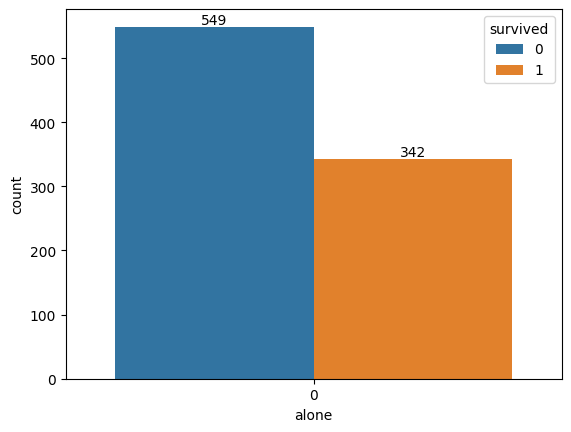

In [ ]:
ax= sns.countplot(x='alone',data=df,hue='survived')
for p in ax.containers:
  ax.bar_label(p)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_grp
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,0,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,0,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,0,Adult


In [ ]:
df.groupby('embarked')['survived'].mean()* 100

,survived
embarked,
C,55.357143
Q,38.961039
S,33.695652


<Axes: xlabel='embarked', ylabel='count'>

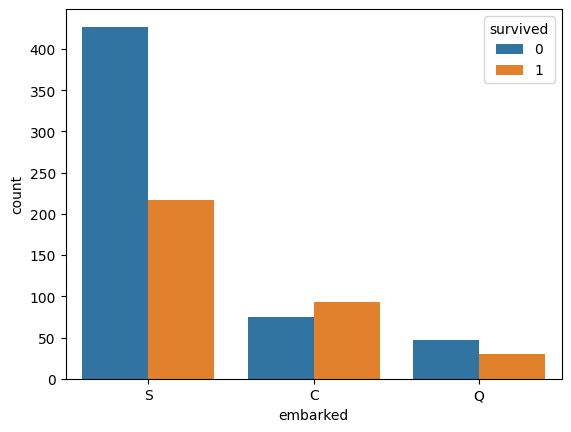

In [ ]:
sns.countplot(data=df,x='embarked',hue='survived')

In [ ]:
by = df.groupby('fare')['survived'].mean()* 100

by=by.head(10)

<Axes: xlabel='fare'>

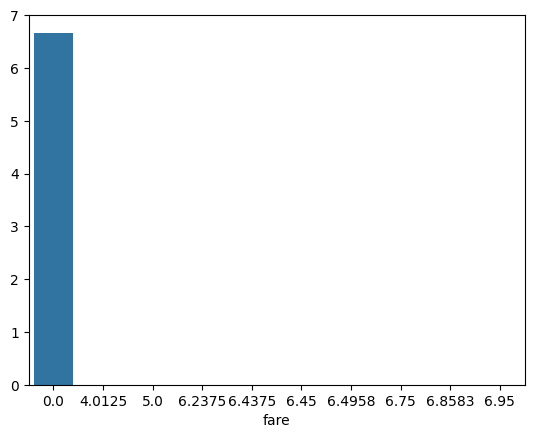

In [ ]:
sns.barplot(x=by.index,y=by.values)

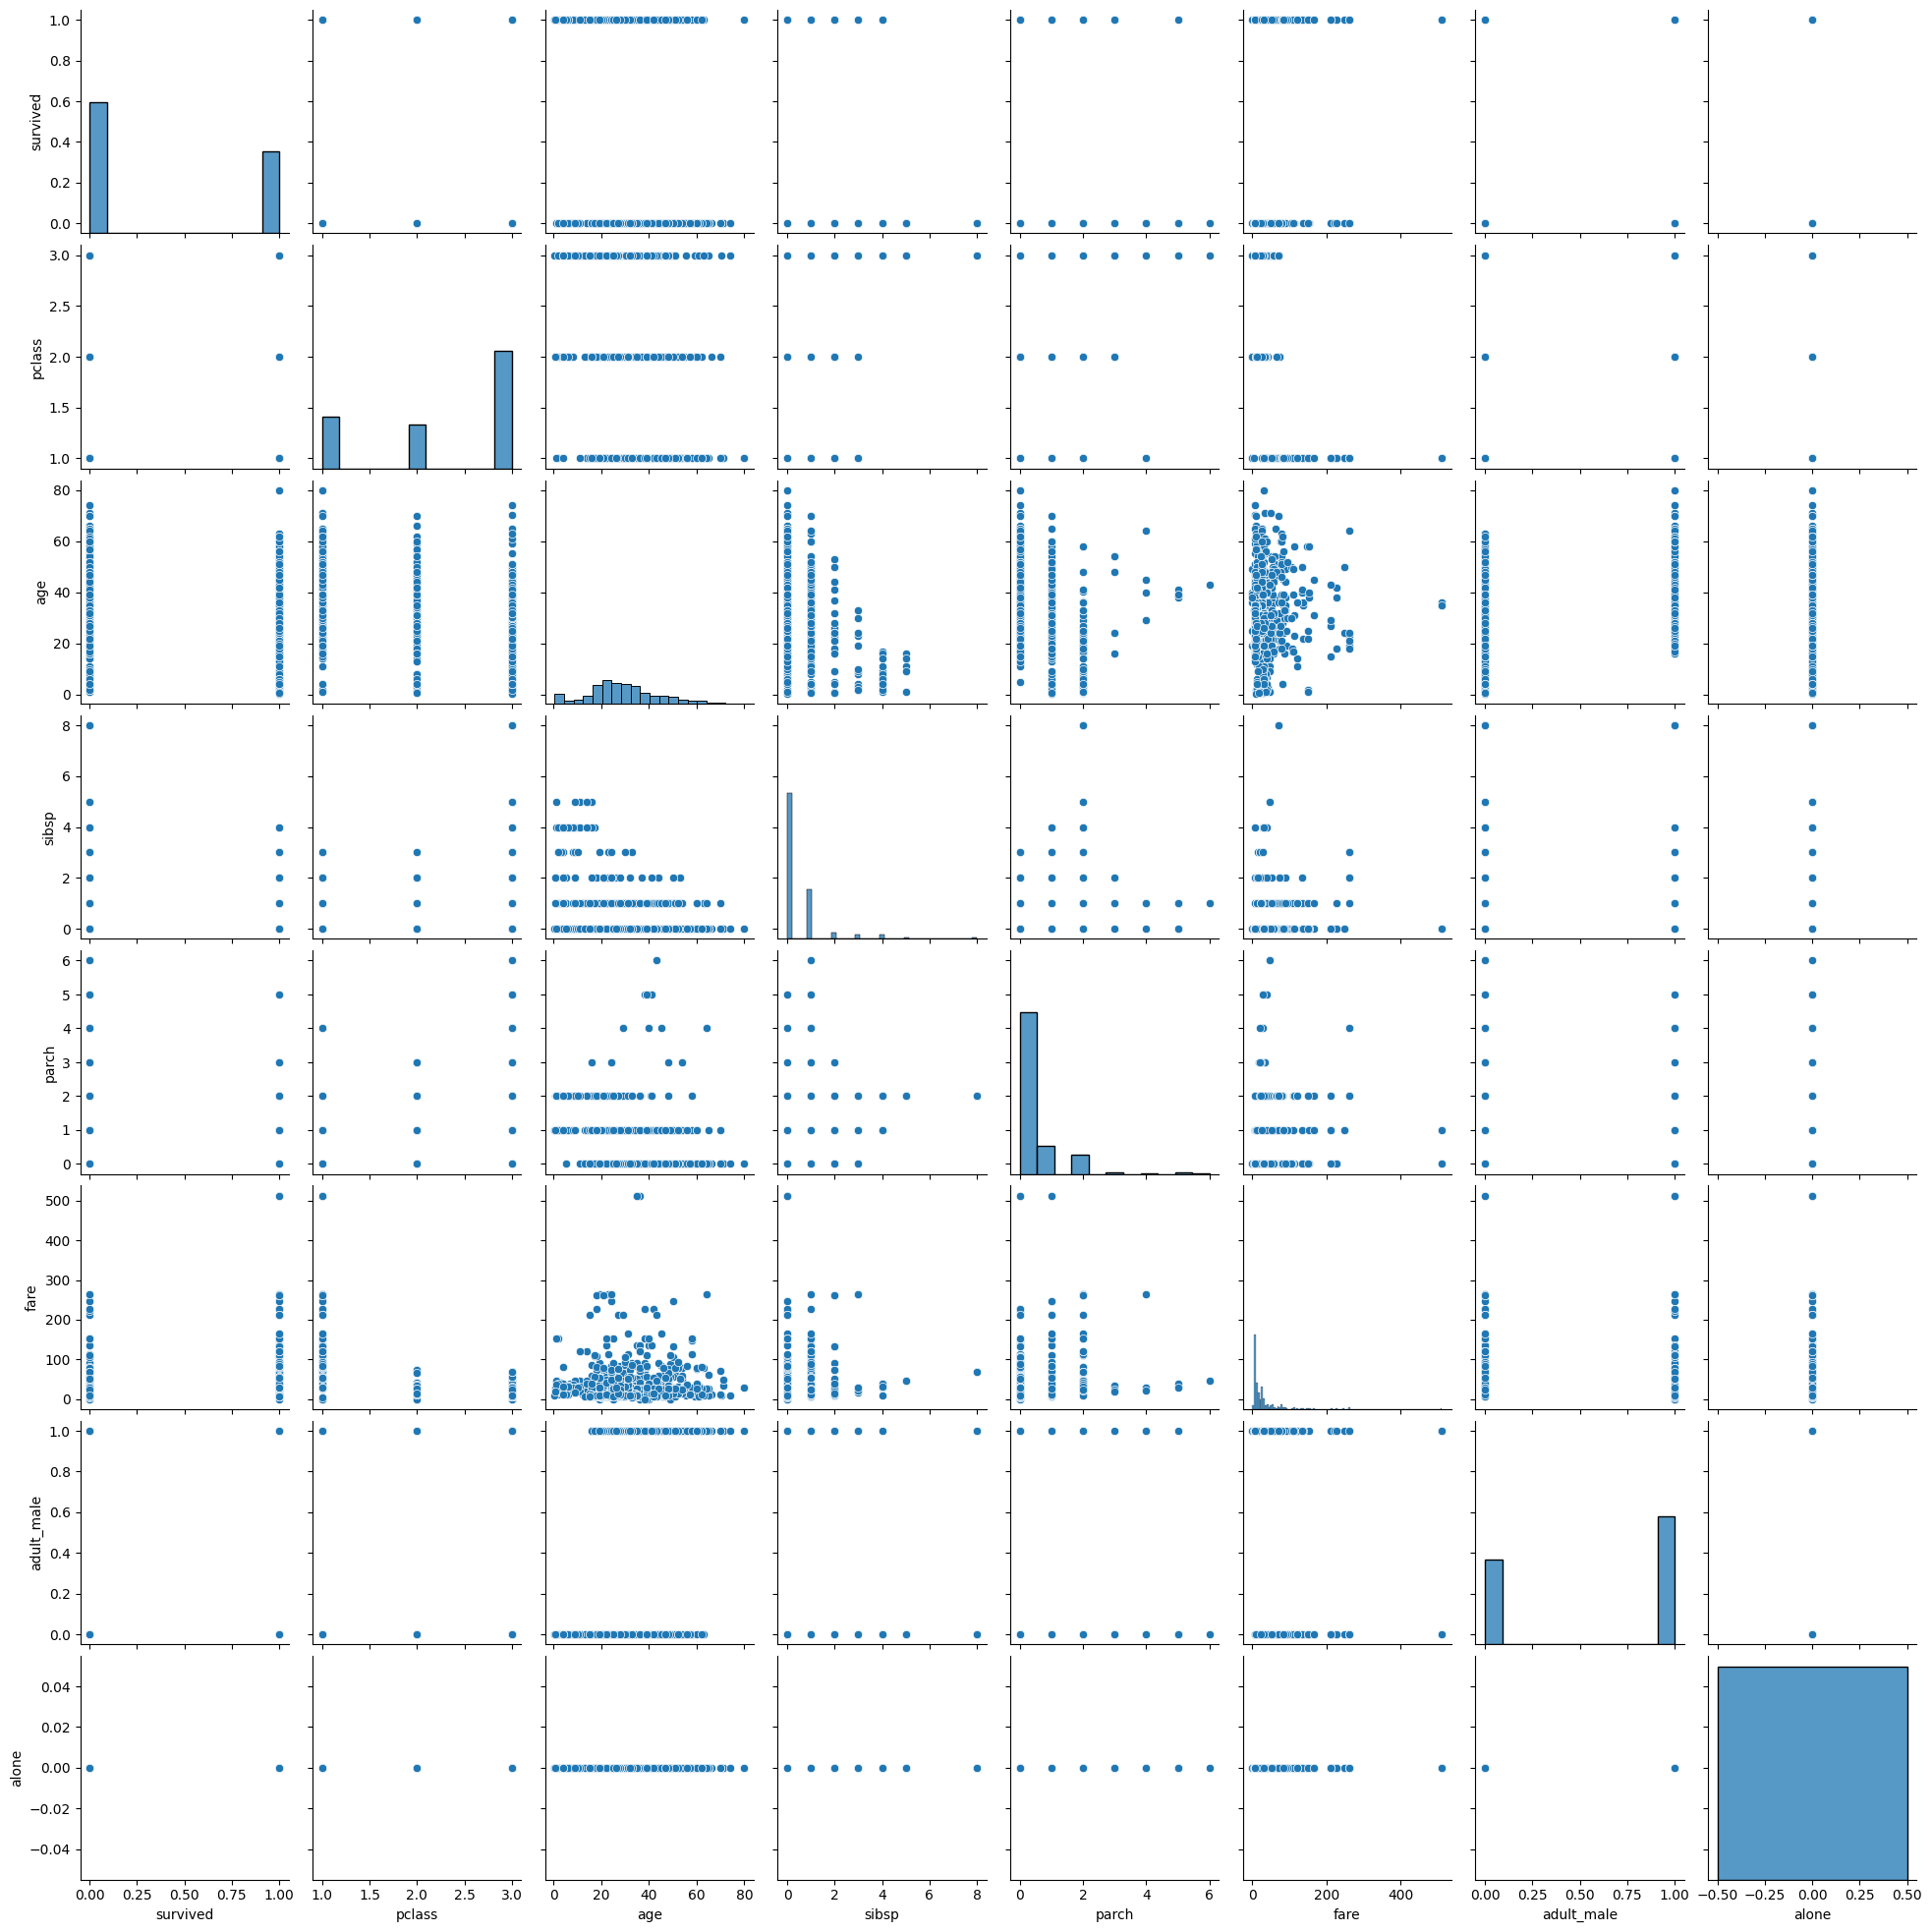

In [ ]:
sns.pairplot(data=df)

In [ ]:
flights= sns.load_dataset('flights')

In [ ]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<Axes: xlabel='year', ylabel='passengers'>

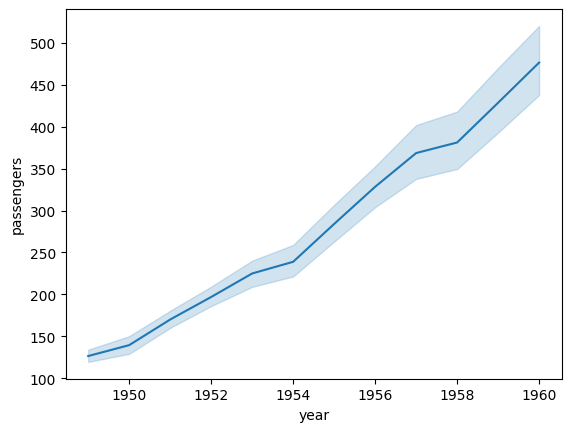

In [ ]:
sns.lineplot(data=flights,x='year',y='passengers')

In [ ]:
flights.pivot_table(index='year',columns='month',values='passengers')

/tmp/ipython-input-2126093385.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(index='year',columns='month',values='passengers')


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0
1950,115.0,126.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1951,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0
1952,171.0,180.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0,191.0,172.0,194.0
1953,196.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,211.0,180.0,201.0
1954,204.0,188.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0,229.0,203.0,229.0
1955,242.0,233.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0,274.0,237.0,278.0
1956,284.0,277.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0,306.0,271.0,306.0
1957,315.0,301.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0,347.0,305.0,336.0
